## Converting image to frequency domain

**Aim:** Approximating given image of a shape- tested on circle and square

**Strategy:**
- Edge detection 
- Apply Fourier Transform to convert to frequency domain
- Plot reconstructed image

### Initializing

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Load and convert image to grayscale
img = cv2.imread('tiger.png')
assert img is not None, "Image path not loaded correctly"
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #CV uses BGR instead of RGB

# convert the image to grayscale format
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#blur the image using Gaussian filter for noise reduction
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

### Edge detection

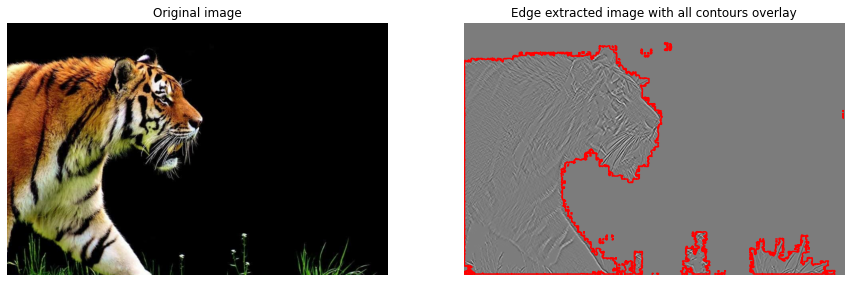

In [3]:
# Sobel Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)
sobelxy_abs = cv2.convertScaleAbs(sobelxy)

contours, _ = cv2.findContours(sobelxy_abs, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Plot all contours without filtering, to inspect the results
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(img)
axs[0].set_title("Original image")
axs[0].axis('off')

axs[1].imshow(sobelxy, cmap='gray')

# Plot each detected contour in red
for contour in contours:
    x_coords = np.array([point[0][0] for point in contour])
    y_coords = np.array([point[0][1] for point in contour])
    axs[1].plot(x_coords, y_coords, color='red')

axs[1].set_title("Edge extracted image with all contours overlay")
axs[1].axis('off')
plt.show()

### Fourier Transform on coordiantes

In [4]:
# Perform 1D Fourier Transforms on x and y coordinate arrays
ft_x = np.fft.fft(x_coords)
ft_y = np.fft.fft(y_coords)

# Get frequencies for synthesis
frequencies_x = np.fft.fftfreq(len(ft_x))
frequencies_y = np.fft.fftfreq(len(ft_y))

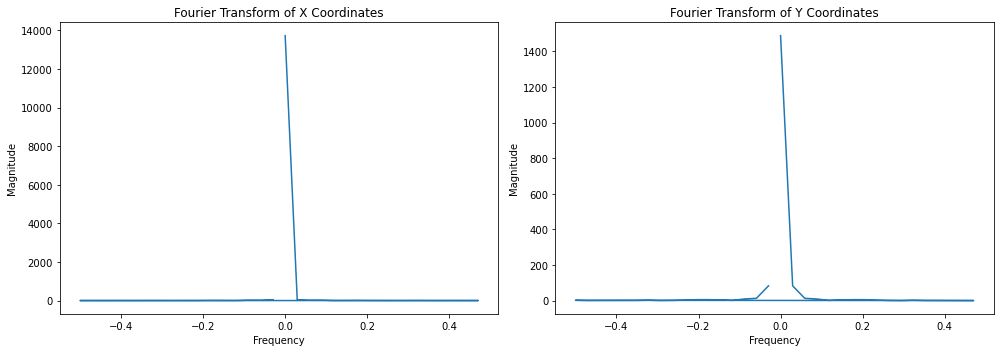

In [5]:
# Plot magnitudes to visualize the strength of each frequency component
magnitude_x = np.abs(ft_x)
magnitude_y = np.abs(ft_y)

# Plot the Fourier Transform magnitudes for x and y
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(frequencies_x, magnitude_x)
plt.title("Fourier Transform of X Coordinates")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.subplot(1, 2, 2)
plt.plot(frequencies_y, magnitude_y)
plt.title("Fourier Transform of Y Coordinates")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()